In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem


Generate a dataframe of SMC dft dataset

In [6]:
#Preparing to match dft data to ligands we use in smc
#Turing smiles from smc to inchi
df = pd.read_excel('P_selected.xlsx', engine = 'openpyxl', sheet_name='test')
#smc_inchi = smc_df['Smiles'].map(Chem.MolFromSmiles).map(Chem.MolToInchi)

In [7]:
df.shape

(182, 203)

Clean up the data
 - clear up non values
 - dropping zero-variance features and similar features

In [8]:
#Arbitrarily assign 0 value to all NaN spaces
df.replace(np.nan, 0)
df = df.sample(frac=1,random_state=42)
#Dropping some of the incomplete/useless parts of dataset
df_origin = df
df_y=df[['ID','x198']]
try:
    df = df.drop(columns = ['SMILES','y1','y2','y3','y4','buch'])
    df = df.drop(columns = ['y6','y10','y11','y12','y13','y14','y17'])
    df = df.drop(columns = ['y15','y16','y18','y19','y5','y7','y8','y9'])
    df = df.drop(columns = ['y1','y2','y11','y12','y13','y14','y16','SMILES','x198'])
except:
    pass
df.to_excel("output.xlsx")  


In [9]:
df=df.drop(columns = ['SMILES','SMC_dataset','x198'])

In [10]:
# drop highly correlated features
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)
print (f"Dropping {len(to_drop)} features {to_drop}")

Dropping 57 features ['ID', 'x7', 'x11', 'x22', 'x39', 'x40', 'x41', 'x48', 'x49', 'x61', 'x63', 'x71', 'x72', 'x74', 'x81', 'x82', 'x83', 'x84', 'x85', 'x89', 'x90', 'x94', 'x96', 'x99', 'x100', 'x107', 'x108', 'x110', 'x111', 'x113', 'x114', 'x118', 'x119', 'x124', 'x127', 'x130', 'x134', 'x135', 'x136', 'x137', 'x138', 'x140', 'x142', 'x145', 'x148', 'x149', 'x151', 'x152', 'x153', 'x155', 'x158', 'x159', 'x160', 'x162', 'x192', 'x200', 'x202']


c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x8,x9,x10,...,x185,x186,x187,x188,x189,x190,x191,x193,x199,x201
19,71,-0.057294,1.820507,-0.236306,-0.024862,-0.130584,0.211444,0.086016,-0.414627,0.748238,...,6.050435,7.146930,6.639641,7.231066,0.591425,6.759989,8,73.927583,0,0
42,2,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.069846,-0.356952,0.796412,...,7.021625,7.306643,7.025374,8.361404,1.336030,7.424874,17,1404.282722,0,0
154,23,-0.058485,1.820739,-0.227985,-0.028953,-0.128469,0.199032,0.042931,-0.339048,0.783697,...,6.937709,7.421487,6.938344,7.451054,0.512710,7.270837,33,8479.035139,14,41
98,588,-0.064434,1.799227,-0.225558,0.034935,-0.095312,0.260492,0.111650,-0.433440,0.763207,...,6.054464,7.206300,5.804570,7.410007,1.605438,7.142175,20,232.277444,0,0
146,8,-0.059782,1.802830,-0.228121,-0.022783,-0.125452,0.205338,0.080182,-0.405563,0.777885,...,6.137342,7.331124,7.181870,7.398709,0.216839,7.232378,18,468.486889,33,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,58,-0.054159,1.817418,-0.223448,-0.021187,-0.122318,0.202261,0.086313,-0.382329,1.138463,...,6.043258,6.808190,6.807682,7.220456,0.412774,7.220456,2,44.583417,0,0
14,237,-0.050656,1.853118,-0.225008,-0.027397,-0.126202,0.197611,0.059923,-0.383886,0.797515,...,6.028400,6.940693,6.910714,6.961573,0.050859,6.958809,4,260.273194,0,0
92,536,-0.057296,1.810385,-0.234495,-0.024822,-0.129659,0.209673,0.082396,-0.407942,0.751701,...,6.024558,7.226381,6.499496,7.763947,1.264451,7.092112,49,567.217722,0,0
179,923,-0.060641,1.820164,-0.231030,-0.024000,-0.127515,0.207030,0.087540,-0.367760,0.720210,...,3.624764,7.936292,7.936292,7.936292,0.000000,7.936292,1,9.807083,150,150


UMAP Dimension Reduction to 2

In [12]:
from sklearn.decomposition import PCA
from umap import UMAP
# define the dimensionalities of the reduced representation to study
dims = [50, 30, 20, 10, 5, 2]
# dictionary to store data at different levels of dimensionality reduction
dfs={}
# UMAP section
n_neighbors = np.int(np.sqrt(df.shape[1]))
for dim in dims:
    key = f"umap{dim}"
    dfs[key] = pd.DataFrame(UMAP(n_components=dim, n_neighbors=n_neighbors).fit_transform(df), index=df.index)
# PCA section
pc = pd.DataFrame(PCA(n_components=None).fit_transform(df), index=df.index)
for dim in dims:
    key = f"pc{dim}"
    dfs[key] = pc.iloc[:, :dim]

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


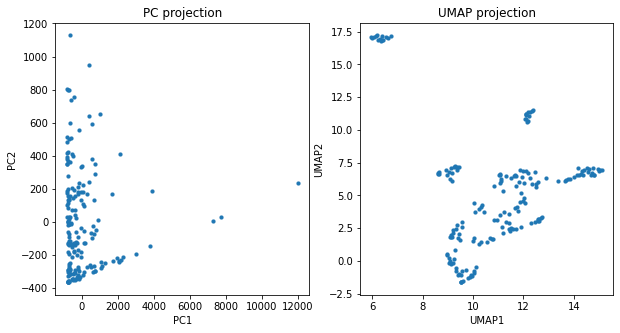

In [13]:
# Visualize the embeddings
f, ax = plt.subplots(1, 2, figsize=(10, 5)) #, dpi=200)
dfs['pc2'].columns = ['PC1', 'PC2']
dfs['umap2'].columns = ['UMAP1', 'UMAP2']
_= sns.scatterplot(x='PC1', y='PC2', data=dfs['pc2'], s=15, alpha=1, linewidth=0.25,  edgecolor='face', ax=ax[0]).set_title("PC projection")
_=sns.scatterplot(x='UMAP1', y='UMAP2', data=dfs['umap2'], s=15, alpha=1, linewidth=0.25, edgecolor='face', ax=ax[1]).set_title("UMAP projection")

Clustering

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from sklearn.metrics import silhouette_score
# Define the numbeor of clusters to study
N_CLS_list = list(range(5, 41))
def silhouette_scores_hierarchical(data, n_cls_list):
 """helper function to compute a silhouette score for hierarchical cluster
ing using Ward linkage"""
 
 z = linkage(data, method='ward')
 
 result = pd.Series(index=n_cls_list, dtype=float)
 for n_cls in n_cls_list:
    cls = fcluster(z, n_cls, criterion='maxclust')
    result.loc[n_cls] = silhouette_score(data, cls)
 return result


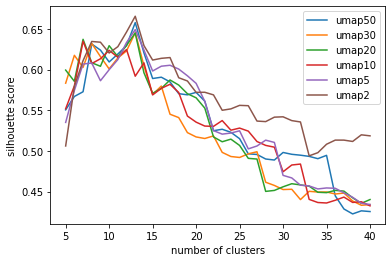

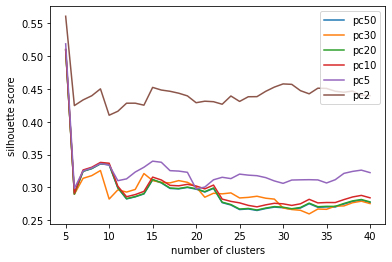

In [15]:
# populate silhouette scores for all number of clusters and all dimensionality reductions that are pre-calculated
silh_scores = pd.DataFrame(index=N_CLS_list)
for key, value in dfs.items():
    silh_scores[key] = silhouette_scores_hierarchical(value, N_CLS_list)
# plot the silhouette scores
_=silh_scores.groupby(silh_scores.columns.str.startswith('pc'), axis=1).plot(
xlabel='number of clusters',ylabel='silhouette score')


Final Clustering

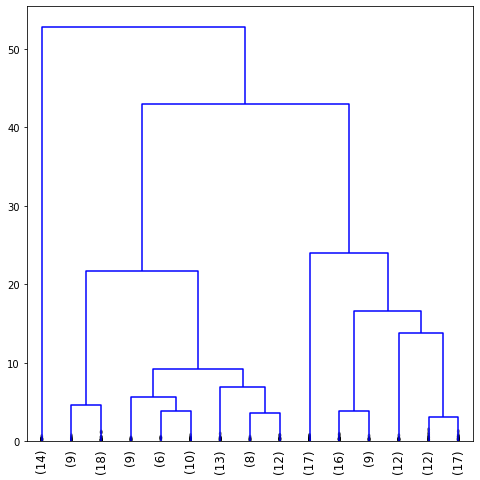

In [16]:
# final number of clusters to produce
NCLS = 15
# linkage and clustering for selected featurization
z = linkage(dfs['umap10'], method="ward")
cls = fcluster(z, NCLS, criterion='maxclust')
# plot the dendrogram
plt.figure(figsize=(8, 8))
_=dendrogram(z, truncate_mode='lastp', p=NCLS, show_contracted=True, leaf_rotation=90, color_threshold=0)


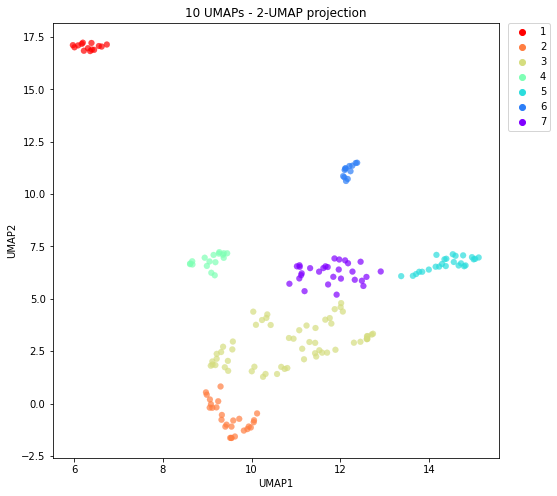

In [17]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


In [18]:
df['SMC_dataset']=df_origin['SMC_dataset']

It makes sense - in cluster 2 there's full of phosphites. I won't expect them to be in the set of 'working ligands'. 

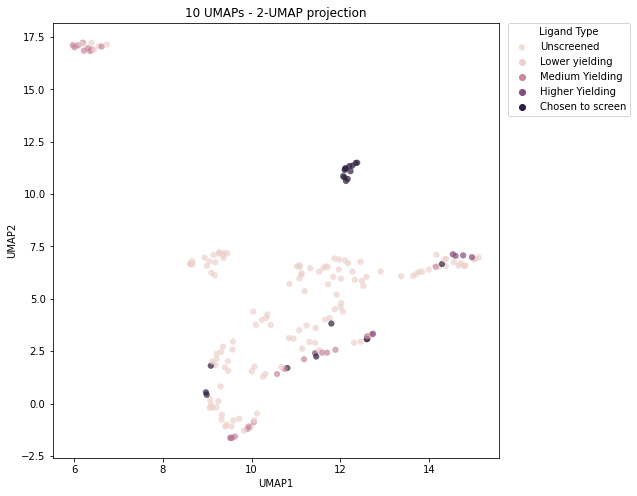

In [22]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
  legend='full', hue=df_origin['SMC_dataset']).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(title='Ligand Type', labels=['Unscreened', 'Lower yielding','Medium Yielding','Higher Yielding','Chosen to screen'],bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


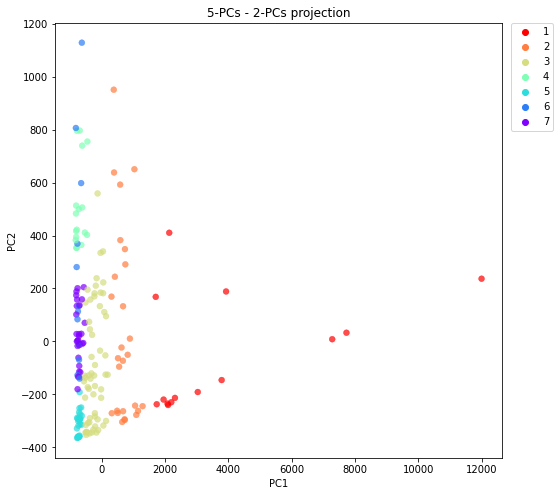

In [28]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.4, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("5-PCs - 2-PCs projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

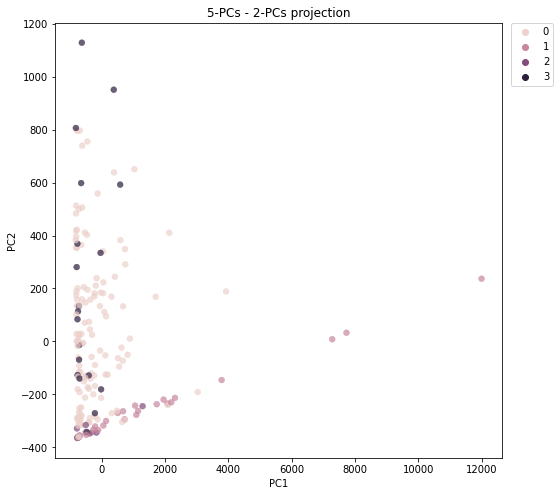

In [29]:
# plot clustering
NCLS = 7
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.4, edgecolor='face',
 legend='full', hue=df['SMC_dataset']).set_title("5-PCs - 2-PCs projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [30]:
def generate_ligand_data(df):
    #Convert the smiles of ligand to a dataframe.
    df = df.copy()
    rxns = []
    smiles = df_origin['SMILES']
    for i in smiles:
        try:
            ligand_smiles = Chem.MolFromSmiles(i)
            rxns.append(ligand_smiles)
        except:
            print(i)
        
    return rxns

Cluster 1, n molecules: 14


[01:24:44] Explicit valence for atom # 7 B, 6, is greater than permitted


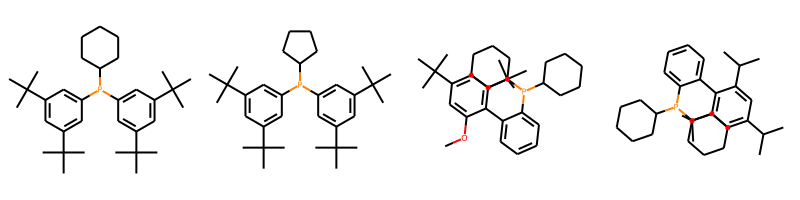

Cluster 2, n molecules: 27


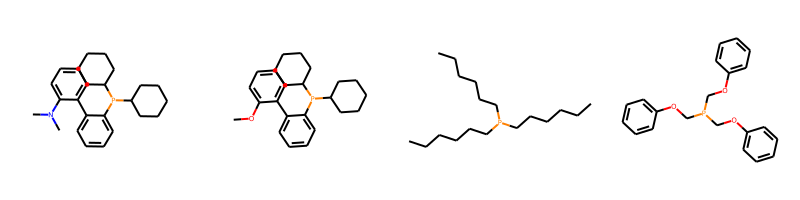

Cluster 3, n molecules: 58


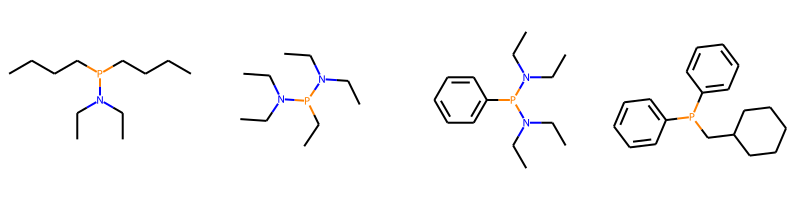

Cluster 4, n molecules: 17


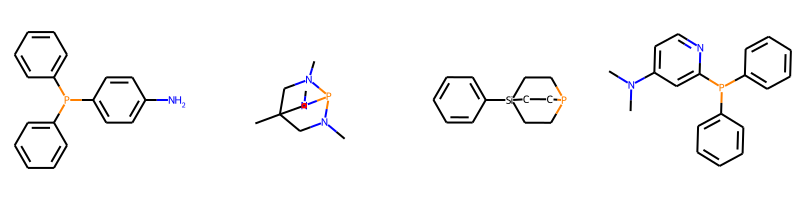

Cluster 5, n molecules: 25


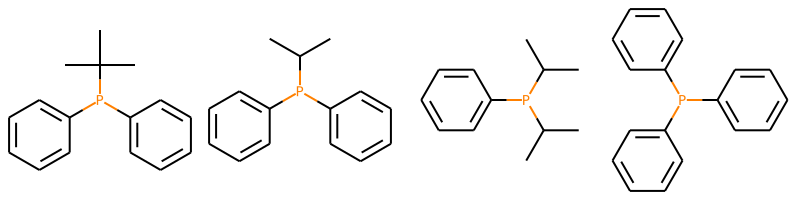

Cluster 6, n molecules: 12


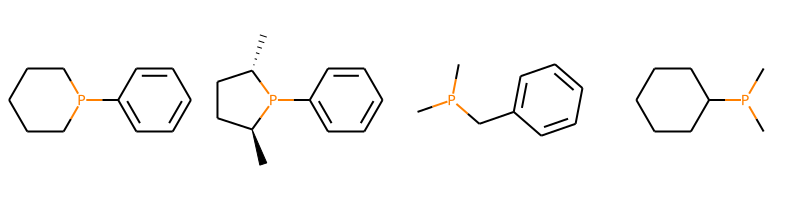

Cluster 7, n molecules: 29


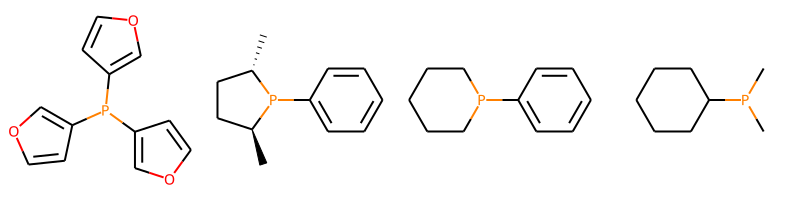

In [31]:
from scipy.spatial.distance import cdist
from rdkit.Chem import Draw
# build rdkit molecules for all candidates
df = df
df['mol'] = generate_ligand_data(df)
mols = pd.Series(((df['mol'])), index=df.index).to_frame('mol')
features='umap2'
# How many central molecules to display?
n_per_cluster = 4
# store central candidates for 
cands=[]
for group, data in mols.groupby(cls):
 # get descriptor data for this cluster
 desc_data=dfs[features].loc[data.index]
 
 # compute distances of these molecules to their center
 dists=pd.Series(cdist([desc_data.mean()], desc_data)[0],
 index=desc_data.index)
 # select top n central molecules
 selected=dists.sort_values().head(n_per_cluster).index
 
 smi=mols.loc[selected]['mol'].map(Chem.MolToSmiles)
 smi=smi.reset_index(drop=True).to_frame(f"Cluster{group}")
 cands.append(smi)
 
 print (f"Cluster {group}, n molecules: {len(data)}")
 ms = data['mol'].loc[selected]
 display(Draw.MolsToGridImage(ms, molsPerRow=n_per_cluster))
 
cands = pd.concat(cands, axis=1)

In [ ]:
cands

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,COc1cc(C(C)(C)C)cc(C(C)(C)C)c1-c1ccccc1P(C1CCC...,CN1CC2(C)CN(C)P1N(C)C2,Cc1c(C)c(C)p(-c2ccccc2)c1C,COc1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,CCCCP(CCCC)N(CC)CC
1,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2...,CN(C)c1ccnc(P(c2ccccc2)c2ccccc2)c1,Cc1cc(C)cc(P(c2cc(C)cc(C)c2)c2cc(C)cc(C)c2)c1,CCCCCCP(CCCCCC)CCCCCC,CCN(CC)P(CC)N(CC)CC
2,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)[C...,Nc1ccc(P(c2ccccc2)c2ccccc2)cc1,COc1ccccc1P(c1ccccc1)c1ccccc1,CN(C)c1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,c1ccc(P(CC2CCCCC2)c2ccccc2)cc1
3,CCO[Si](CCCP(c1ccccc1)c1ccccc1)(OCC)OCC,CC(C)P(C)C(C)C,Oc1ccc(P(c2ccccc2)c2ccccc2)cc1,CC(C)c1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,C[C@@H]1CC[C@@H](C)P1c1ccccc1C1OCCO1


# Plotting 3d diagram of the ligand awaited screening

In [ ]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],c=df['x198'])
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

A plot of axis: x4 x51 , and  x182


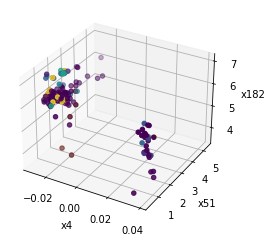

In [ ]:
plot_three_features(df,'x4','x51','x182')

In [ ]:
# Plot a diagram from angle a, b with yields. Remember to use df_origin and df_origin['x198'-'x202'] as input. 
# You can use df_x and df_y, but check and compare the index before use.
def plot_three_features_anydir(df_x,i,j,k,df_y,a,b):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],c=df_y)
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    # rotate the axes by angles you want
    ax.view_init(a,b)
        
    plt.show()

A plot of axis: x4 x51 , and  x182


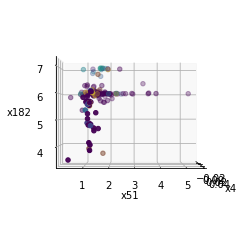

A plot of axis: x4 x51 , and  x182


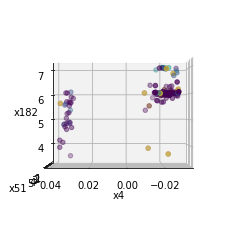

A plot of axis: x4 x51 , and  x182


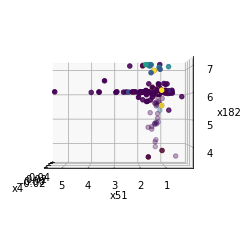

A plot of axis: x4 x51 , and  x182


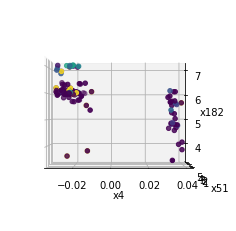

In [ ]:
# Plot 'fraction=12' number of diagrams from different angles, rotating 360/fraction degrees at a time.
blist=[]
a=0
fraction = 4
for i in range(0,fraction):
    blist.append(i*(360/fraction))
for i in blist:
    plot_three_features_anydir(df,'x4','x51','x182',df['x198'],a,i)